<a href="https://colab.research.google.com/github/TiwariKishan/Hate_Speech_Detection/blob/master/glove_eng_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


## Adding in some more useful packages here
import matplotlib.pyplot as plt



In [0]:
train=pd.read_csv('/content/drive/My Drive/english_dataset.tsv', sep = '\t')

In [12]:
train.head()
train['task_1'].value_counts()
train['task_1'] = train['task_1'].map({'NOT': 0, 'HOF': 1})
train

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,1,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,0,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,0,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,0,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",1,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,0,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,1,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,1,OFFN,UNT


Percent of insincere entries 38.636 %


,text_id,text,task_1,task_2,task_3
1,hasoc_en_2,@politico No. We should remember very clearly ...,1,HATE,TIN
7,hasoc_en_8,#ADOS #trendingnow #blacklivesmatter #justice ...,1,PRFN,TIN
11,hasoc_en_12,I don’t know how much more I can take! 45 is a...,1,HATE,TIN
15,hasoc_en_16,Good work @ICC keep going just destroy the who...,1,PRFN,TIN
23,hasoc_en_24,#ShameOnICC 1. ICC on Dhoni's gloves ...,1,HATE,TIN


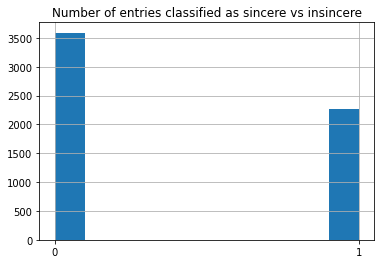

In [13]:
fig,ax = plt.subplots(1,1)
train.hist(column = 'task_1', ax = ax)
ax.set_title('Number of entries classified as sincere vs insincere')
ax.set_xticks([0,1])
print('Percent of insincere entries %.3f %%'%(100*(sum(train['task_1'])/len(train))))

train[train['task_1']==1].head()

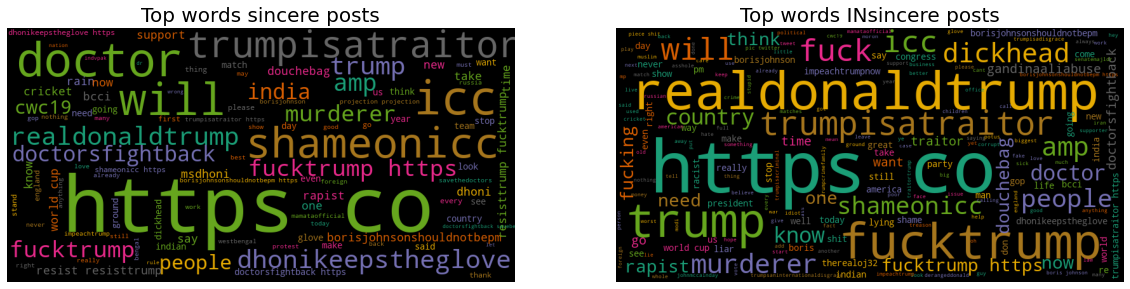

In [14]:
from wordcloud import WordCloud
n_posts = 1000
q_S = ' '.join(train[train['task_1'] == 0]['text'].str.lower().values[:n_posts])
q_I = ' '.join(train[train['task_1'] == 1]['text'].str.lower().values[:n_posts])

wordcloud_S = WordCloud(max_font_size=None, scale = 2,colormap = 'Dark2').generate(q_S)
wordcloud_I = WordCloud(max_font_size=None, scale = 2,colormap = 'Dark2').generate(q_I)

fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(wordcloud_S)
ax[0].set_title('Top words sincere posts',fontsize = 20)
ax[0].axis("off")

ax[1].imshow(wordcloud_I)
ax[1].set_title('Top words INsincere posts',fontsize = 20)
ax[1].axis("off")

plt.show()

In [15]:
embeddings_index = {}
f = open('/content/drive/My Drive/glove6b300dtxt/glove.6B.300d.txt')
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')

GloVe data loaded


In [16]:
import re

## Iterate over the data to preprocess by removing stopwords
lines_without_stopwords=[] 
for line in train['text'].values: 
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        #if word not in stop:
            new_line.append(word)
    lines_without_stopwords.append(new_line)
texts = lines_without_stopwords

print(texts[0:5])

[['dhonikeepstheglove', 'watch', 'sports', 'minister', 'kiren', 'rijiju', 'issues', 'statement', 'backing', 'ms', 'dhoni', 'over', 'balidaan', 'badge', 'tells', 'bcci', 'to', 'take', 'up', 'the', 'matter', 'with', 'icc', 'and', 'keep', 'government', 'in', 'the', 'know', 'as', 'nation', 's', 'pride', 'is', 'involved', 'https', 't', 'co', 'zuo5335rjr'], ['politico', 'no', 'we', 'should', 'remember', 'very', 'clearly', 'that', 'individual1', 'just', 'admitted', 'to', 'treason', 'trumpisatraitor', 'mccainsahero', 'johnmccainday'], ['cricketworldcup', 'guess', 'who', 'would', 'be', 'the', 'winner', 'of', 'this', 'cwc19', 'team', 'who', 'gets', 'maximum', 'points', 'from', 'the', 'abandoned', 'matches', 'shameonicc', 'wivseng', 'icc'], ['corbyn', 'is', 'too', 'politically', 'intellectual', 'for', 'borisjohnsonshouldnotbepm', 'can', 't', 'wait', 'generalelectionnow', 'https', 't', 'co', 'pt8kmjfxjj'], ['all', 'the', 'best', 'to', 'teamindia', 'for', 'another', 'swimming', 'competition', 'on',

In [17]:
## Code adapted from (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# Vectorize the text samples

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

MAX_NUM_WORDS = 1000
MAX_SEQUENCE_LENGTH = 100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(train['task_1']))
print(data.shape)
print(labels.shape)

Found 20208 unique tokens.
(5852, 100)
(5852, 2)


In [18]:
import os
print(os.listdir('/content/drive/My Drive/glove6b300dtxt'))

['glove.6B.300d.txt']


In [0]:
# prepare embedding matrix 
from keras.initializers import Constant
from keras.layers import Embedding
## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
EMBEDDING_DIM = embeddings_index.get('a').shape[0]
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [20]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

model = Sequential()
model.add(Embedding(num_words, 300, input_length=100, weights= [embedding_matrix], trainable=False))

model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
print(labels.shape)
model.fit(data, np.array(labels), validation_split=0.1, epochs = 13)

(5852, 2)
Train on 5266 samples, validate on 586 samples
Epoch 1/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.2376 - acc: 0.9021 - val_loss: 1.4575 - val_acc: 0.4957
Epoch 2/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.1805 - acc: 0.9315 - val_loss: 1.8433 - val_acc: 0.4343
Epoch 3/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.1646 - acc: 0.9343 - val_loss: 2.1067 - val_acc: 0.4027
Epoch 4/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.1497 - acc: 0.9440 - val_loss: 2.1480 - val_acc: 0.4181
Epoch 5/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.1296 - acc: 0.9521 - val_loss: 2.6780 - val_acc: 0.3720
Epoch 6/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.1118 - acc: 0.9596 - val_loss: 2.3071 - val_acc: 0.4539
Epoch 7/13
5266/5266 [==============================] - 10s 2ms/step - loss: 0.0983 - acc: 0.9643 - val_loss: 2.6563 - val_acc: 0.413

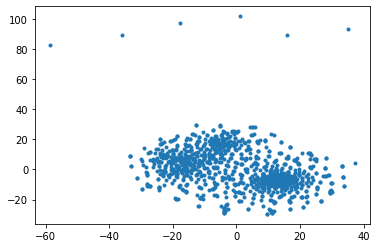

In [23]:
## Model visualization code adapted from: https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa

from sklearn.manifold import TSNE
## Get weights
embds = model.layers[0].get_weights()[0]
## Plotting function
## Visualize words in two dimensions 
tsne_embds = TSNE(n_components=2).fit_transform(embds)

plt.plot(tsne_embds[:,0],tsne_embds[:,1],'.')